In [7]:
import numpy as np 
import cvxpy as cp 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]

## problem (a)


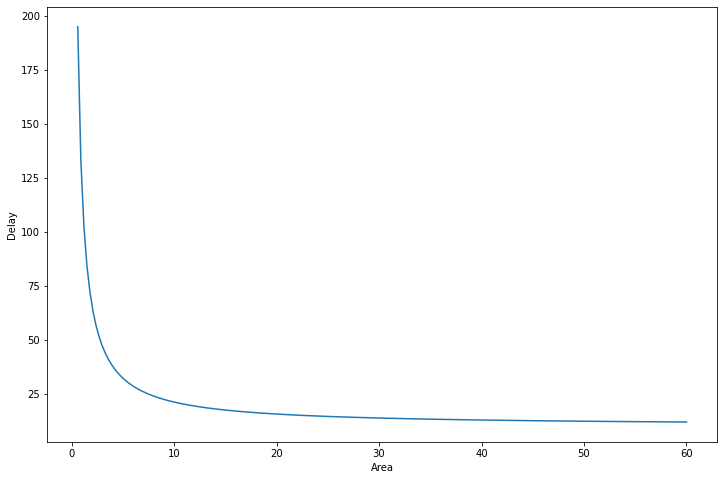

In [4]:
cload_1 = 1.5
cload_2 = 1
cload_3 = 5
w_in = 0.1
w_max = 10
ws = np.linspace(w_in,w_max,200)
Ts_a = np.zeros(ws.shape[0])
A_a = np.zeros(ws.shape[0]) 
for i,w in enumerate(ws):
    T1 = (w+cload_1)*(3/w)+w*(2/w)+(4*w+cload_2+cload_3)/w 
    T2 = (w+cload_2)*(3/w)+w*(2/w)+(w+cload_3)*(2/w)+(3*w+cload_1)/w 
    T3 = (w+cload_3)*(3/w)+w*(2/w)+(3*w+cload_1)/w + (w+cload_2)*(2/w)
    T_max = np.max([T1,T2,T3])
    Ts_a[i] = T_max
    A_a[i] = 6*w 

plt.plot(A_a,Ts_a)
plt.xlabel("Area")
plt.ylabel("Delay")
plt.show()

## Proble (b)


In [5]:
w1 = cp.Variable(1,pos=True)
w2 = cp.Variable(1,pos=True)
w3 = cp.Variable(1,pos=True)
w4 = cp.Variable(1,pos=True)
w5 = cp.Variable(1,pos=True)
w6 = cp.Variable(1,pos=True)
r1 = 1/w1
r2 = 1/w2
r3 = 1/w3
r4 = 1/w4
r5 = 1/w5
r6 = 1/w6
t = cp.Variable(1,pos= True)
us = np.logspace(-3,3,100)
A_b=np.zeros(us.shape[0])
Ts_b = np.zeros(us.shape[0])
T1 = (w3+cload_1)*(r1+r2+r3)+ w2*(r1+r2) +(w1+w4+w5+w6+cload_2+cload_3)*r1
T2 = (w5+cload_2)*(r1+r4+r5)+w4*(r1+r4)+(w6+cload_3)*(r1+r4)+(w1+w2+w3+cload_1)*r1
T3 = (w6+cload_3)*(r1+r4+r6)+w4*(r1+r4)+(w1+w2+w3+cload_1)*r1+(w5+cload_2)*(r1+r4)
for i,u in enumerate(us):
    constraints = [
        (w1+w2+w3+w4+w5+w6)+u*(T1) <= t,
        (w1+w2+w3+w4+w5+w6)+u*(T2) <=t,
        (w1+w2+w3+w4+w5+w6)+u*(T3) <=t 
    ]
    assert all(constraint.is_dgp() for constraint in constraints)
    objective = cp.Minimize(t)
    problem = cp.Problem(objective, constraints)
    result = problem.solve(gp=True)
    A_b[i] = (w1+w2+w3+w4+w5+w6).value
    Ts_b[i] = np.max([T1.value,T2.value,T3.value])

    

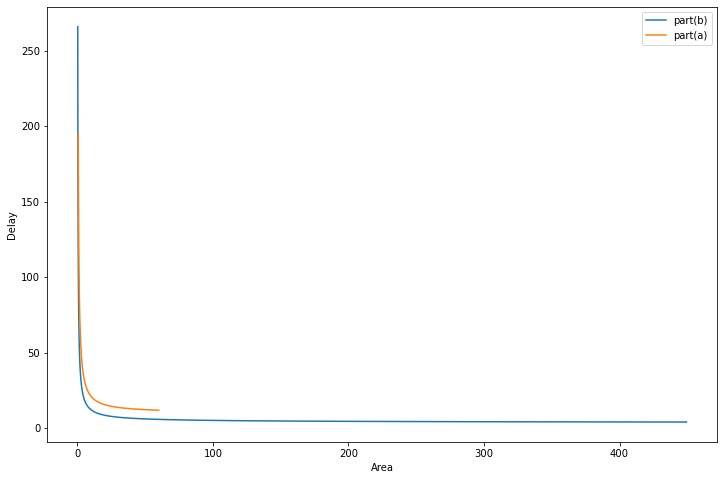

In [6]:
##plot 
plt.plot(A_b,Ts_b, label='part(b)')
plt.plot(A_a,Ts_a,label='part(a)')
plt.legend()
plt.xlabel("Area")
plt.ylabel("Delay")
plt.show()